# Data Analysis : Air Quality Public Dataset
- Nama:   Noval Ariyanto
- Email: noval.riyanjuan@gmail.com
- ID Dicoding: juanvalno

## Menentukan Pertanyaan Bisnis

1. Dari tahun 2013 - 2017, perkembangan tren kualitas udara dari tahun ke tahun mengelami penurunan atau peningkatan?
2. Apakah kualitas udara semakin baik pada malam hari? Untuk menunjang keaktifan produktivitas.
3. Bagaimana kualitas udara pada beberapa Station. Apakah terdapat variasi bedasarkan local geografis?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

sns.set_style("whitegrid")

## 1. Data Wrangling

Di proses ini akan melakukan beberapa tahap untuk mempersiapkan kualitas data sebelum melakukan Exploration Data
- Gathering Data
- Assessing Data
- Cleaning Data

### 1.1 Gathering Data

In [2]:
Aotizhongxin = pd.read_csv('Dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Changping = pd.read_csv('Dataset/PRSA_Data_Changping_20130301-20170228.csv')
Dingling = pd.read_csv('Dataset/PRSA_Data_Dingling_20130301-20170228.csv')
Dongsi = pd.read_csv('Dataset/PRSA_Data_Dongsi_20130301-20170228.csv')
Guanyuan = pd.read_csv('Dataset/PRSA_Data_Guanyuan_20130301-20170228.csv')
Gucheng = pd.read_csv('Dataset/PRSA_Data_Gucheng_20130301-20170228.csv')
Huairou = pd.read_csv('Dataset/PRSA_Data_Huairou_20130301-20170228.csv')
Nongzhanguan = pd.read_csv('Dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Shunyi = pd.read_csv('Dataset/PRSA_Data_Shunyi_20130301-20170228.csv')
Tiantan = pd.read_csv('Dataset/PRSA_Data_Tiantan_20130301-20170228.csv')
Wanliu = pd.read_csv('Dataset/PRSA_Data_Wanliu_20130301-20170228.csv')
Wanshouxigong = pd.read_csv('Dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

data = {'aotizhongxin': Aotizhongxin,
        'changping': Changping,
        'dingling': Dingling,
        'congsi': Dongsi,
        'guanyuan': Guanyuan,
        'gucheng': Gucheng,
        'huairou': Huairou,
        'nongzhanguan': Nongzhanguan,
        'shunyi': Shunyi,
        'tiantan': Tiantan,
        'wanliu': Wanliu,
        'wanshouxigong': Wanshouxigong}

1. PM2.5: Partikel materi (particulate matter) dengan diameter 2.5 mikron atau lebih kecil. Partikel ini berbahaya bagi kesehatan karena dapat masuk ke paru-paru dan menyebabkan berbagai masalah pernapasan.

2. PM10: Partikel materi dengan diameter 10 mikron atau lebih kecil. Partikel ini berbahaya bagi kesehatan karena dapat masuk ke paru-paru dan menyebabkan berbagai masalah pernapasan.

3. SO2: Sulfur dioksida, gas yang dihasilkan dari pembakaran bahan bakar fosil seperti batubara dan minyak bumi. Gas ini dapat menyebabkan iritasi pada mata, hidung, dan tenggorokan.

4. NO2: Nitrogen dioksida, gas yang dihasilkan dari pembakaran bahan bakar fosil dan asap kendaraan. Gas ini dapat menyebabkan iritasi pada paru-paru dan memperburuk asma.

5. CO: Karbon monoksida, gas beracun yang dihasilkan dari pembakaran tidak sempurna. Gas ini dapat mengikat hemoglobin dalam darah dan mengurangi kemampuannya membawa oksigen.

6. O3: Ozon, gas yang terbentuk di atmosfer melalui reaksi kimia antara polutan lain. Gas ini dapat menyebabkan iritasi pada mata, hidung, dan tenggorokan.

7. TEMP: Suhu udara dalam derajat Celcius.

8. PRES: Tekanan udara dalam milibar.

9. DEWP: Titik embun, suhu di mana uap air di udara mengembun menjadi air.

10. RAIN: Curah hujan dalam milimeter.

11. wd: Arah angin (dari mana angin bertiup).

12. WSPM: Kecepatan angin dalam meter per detik.

13. Station: Nama stasiun pemantauan kualitas udara.

In [3]:
Aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
Changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
Dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
Dongsi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [7]:
Guanyuan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
Gucheng.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [9]:
Huairou.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
Nongzhanguan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [11]:
Shunyi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
Tiantan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [13]:
Wanliu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [14]:
Wanshouxigong.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [15]:
Aotizhongxin['RAIN'].value_counts()

RAIN
0.0     33664
0.1       314
0.2       161
0.3       107
0.5        73
        ...  
12.9        1
13.6        1
4.2         1
5.0         1
5.1         1
Name: count, Length: 127, dtype: int64

### 1.2 Assessing Data

Pada tahap ini data mengecek kualitas data sebelum melakukan perform, beberapa Outline kami paparkan adalah: 
- Checking data types
- Checking missing values
- Checking duplicates

1.2.1 Check Semua Tipe Data

In [16]:
for data_nm, df in data.items():
    print(f"\n,{data[data_nm].info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

,None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entri

1.2.2 Check Missing Values

In [17]:
for df_name, df in data.items():
    print(df_name, "\n" ,data[df_name].isnull().sum(), "\n")

aotizhongxin 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64 

changping 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64 

dingling 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64 

congsi 
 No            0
year          0
month       

In [18]:
for df_name, df in data.items():
    total_data = df.shape[0]  # Jumlah total baris dalam dataframe
    missing_values_count = data[df_name].isnull().sum()
    percentage_missing = (missing_values_count / total_data) * 100
    print(f"DataFrame: {df_name}")
    print(f"Percentage of missing values:")
    print(percentage_missing)
    print("\n")


DataFrame: aotizhongxin
Percentage of missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.638033
PM10       2.047684
SO2        2.666553
NO2        2.917522
CO         5.065024
O3         4.902464
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64


DataFrame: changping
Percentage of missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.207392
PM10       1.659822
SO2        1.791011
NO2        1.902236
CO         4.337782
O3         1.722564
TEMP       0.151152
PRES       0.142596
DEWP       0.151152
RAIN       0.145448
wd         0.399270
WSPM       0.122633
station    0.000000
dtype: float64


DataFrame: dingling
Percentage of missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       

1.2.3 Check Duplicates Data

In [19]:
count_duplicate = {}
data_length = {}
for df_name, df in data.items():
    count_duplicate[df_name] = df.duplicated().sum()
    data_length[df_name] = df.shape[0]

count_duplicate_df = pd.DataFrame.from_dict(count_duplicate, orient='index', columns=['Duplicate Count'])
data_length = pd.DataFrame.from_dict(data_length, orient='index', columns=['Data Length'])
pd.concat([count_duplicate_df, data_length], axis=1)

,Duplicate Count,Data Length
aotizhongxin,0,35064
changping,0,35064
dingling,0,35064
congsi,0,35064
guanyuan,0,35064
gucheng,0,35064
huairou,0,35064
nongzhanguan,0,35064
shunyi,0,35064
tiantan,0,35064


### 1.3 Data Cleaning

1.3.1 Imputasi Data Missing Value Data Numeric

In [20]:
numeric_col = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for df_name, df in data.items():
    print(df_name)
    print("Jumlah nilai yang hilang sebelum imputasi:")
    print(data[df_name][numeric_col].isnull().sum())
    
    data[df_name][numeric_col] = data[df_name][numeric_col].fillna(data[df_name][numeric_col].mean())
    
    print("\nJumlah nilai yang hilang setelah imputasi:")
    print(data[df_name][numeric_col].isnull().sum())
    print("\n")


aotizhongxin
Jumlah nilai yang hilang sebelum imputasi:
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
WSPM       14
dtype: int64

Jumlah nilai yang hilang setelah imputasi:
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


changping
Jumlah nilai yang hilang sebelum imputasi:
PM2.5     774
PM10      582
SO2       628
NO2       667
CO       1521
O3        604
TEMP       53
PRES       50
DEWP       53
RAIN       51
WSPM       43
dtype: int64

Jumlah nilai yang hilang setelah imputasi:
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


dingling
Jumlah nilai yang hilang sebelum imputasi:
PM2.5     779
PM10      656
SO2       730
NO2      1234
CO       2012
O3       1214
TEMP       53
PRES       50
DEWP       53
RAIN       51
WSPM 

Kita bisa melihat bahwa Missing Value di imputasi menggunakan mean karena jumlah data yang hilang tidak terlalu banyak yaitu dibawah 7%, masih bisa untuk melakukan imputasi menggunakan mean

1.3.2 Imputasi Data Missing Value Data Categoric

In [21]:
for df_name, df in data.items():
    print(df_name)
    print("Jumlah nilai yang hilang sebelum imputasi:")
    print(data[df_name]['wd'].isnull().sum())
    
    mode_value = data[df_name]['wd'].mode()[0] 
    data[df_name]['wd'] = data[df_name]['wd'].fillna(mode_value)
    
    print("\nJumlah nilai yang hilang setelah imputasi:")
    print(data[df_name]['wd'].isnull().sum())
    print("\n")


aotizhongxin
Jumlah nilai yang hilang sebelum imputasi:
81

Jumlah nilai yang hilang setelah imputasi:
0


changping
Jumlah nilai yang hilang sebelum imputasi:
140

Jumlah nilai yang hilang setelah imputasi:
0


dingling
Jumlah nilai yang hilang sebelum imputasi:
140

Jumlah nilai yang hilang setelah imputasi:
0


congsi
Jumlah nilai yang hilang sebelum imputasi:
78

Jumlah nilai yang hilang setelah imputasi:
0


guanyuan
Jumlah nilai yang hilang sebelum imputasi:
81

Jumlah nilai yang hilang setelah imputasi:
0


gucheng
Jumlah nilai yang hilang sebelum imputasi:
159

Jumlah nilai yang hilang setelah imputasi:
0


huairou
Jumlah nilai yang hilang sebelum imputasi:
302

Jumlah nilai yang hilang setelah imputasi:
0


nongzhanguan
Jumlah nilai yang hilang sebelum imputasi:
78

Jumlah nilai yang hilang setelah imputasi:
0


shunyi
Jumlah nilai yang hilang sebelum imputasi:
483

Jumlah nilai yang hilang setelah imputasi:
0


tiantan
Jumlah nilai yang hilang sebelum imputasi:
78

Jumlah nil

1.3.3 Check Missing Value Data

In [22]:
for df_name, df in data.items():
    print(df_name, "\n" ,data[df_name].isnull().sum(), "\n")

aotizhongxin 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

changping 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

dingling 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

congsi 
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         

Sekarang data sudah bersih dari Missing Value, selanjutnya kita akan menuju ke EDA untuk mendapatkan insight dari data yang di analisis

## 2. Exploratory Data Analysis

In [23]:
start_color = "#682F2F"
pal = sns.light_palette(start_color, as_cmap=True)

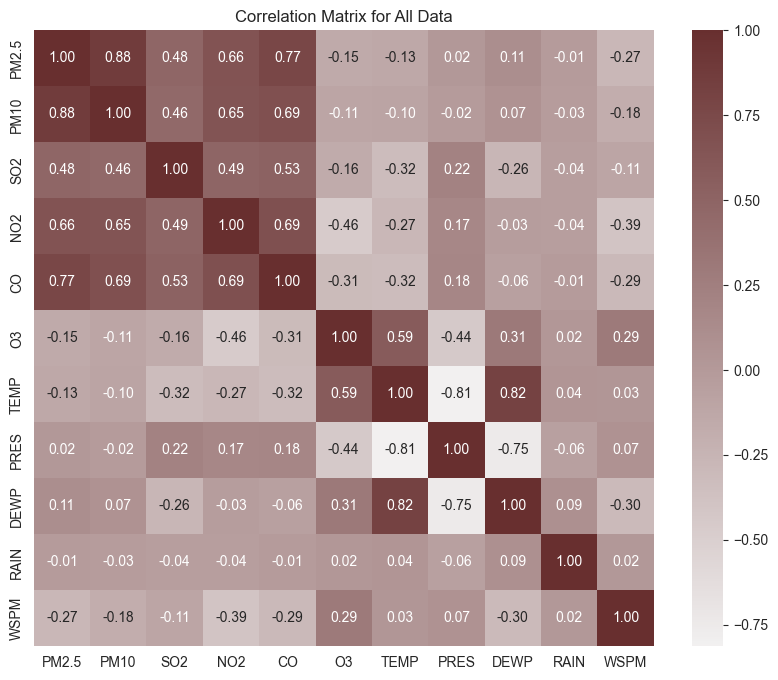

In [24]:
all_data = pd.concat(data.values(), ignore_index=True)

number_plot_corelation = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

correlation_matrix = all_data[number_plot_corelation].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=pal, fmt=".2f")
plt.title("Correlation Matrix for All Data")
plt.show()

Karena PM2.5, PM10, SO2, NO2, dan CO memiliki korelasi positif terbaik terhadap sesama, maka akan menggunakan PCA untuk menganalisis secara keseluruhan untuk menjadi tolak ukur dari beberapa sudut pandang

In [25]:
all_data['PRES'].describe()

count    420768.000000
mean       1010.746341
std          10.469404
min         982.400000
25%        1002.300000
50%        1010.400000
75%        1019.000000
max        1042.800000
Name: PRES, dtype: float64

### 2.1 Features Kualitas, Wilayah, Waktu

2.1.1 Kualitas

In [26]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(all_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']])

scaler = MinMaxScaler()
all_data['Kualitas'] = scaler.fit_transform(pca_result)

In [27]:
all_data['Kualitas'].describe()

count    420768.000000
mean          0.114456
std           0.114209
min           0.000000
25%           0.040539
50%           0.081335
75%           0.141305
max           1.000000
Name: Kualitas, dtype: float64

Kita bisa melihat persebaran data pada kualitas cenderung berada di rata rata 75% kebawah, artinya sebagian besar kualitas udara di berbagai wilayah tergolong baik

In [28]:
all_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO'] + ['Kualitas']].corr()

,PM2.5,PM10,SO2,NO2,CO,Kualitas
PM2.5,1.000000,0.879403,0.477780,0.658936,0.768866,0.772078
PM10,0.879403,1.000000,0.458736,0.646260,0.686963,0.690775
SO2,0.477780,0.458736,1.000000,0.492662,0.525420,0.526349
NO2,0.658936,0.646260,0.492662,1.000000,0.689799,0.691410
CO,0.768866,0.686963,0.525420,0.689799,1.000000,0.999985
Kualitas,0.772078,0.690775,0.526349,0.691410,0.999985,1.000000


Dalam korelasi kualitas terlihat memiliki korelasi positif, ketika kualitas meningkat akan meningkatkan pula beberapa features lain, sehingga nilai semakin mendekati 1 artinya kulitas udara semakin buruk

2.1.2 Wilayah

In [29]:
all_data['PRES'].describe()

count    420768.000000
mean       1010.746341
std          10.469404
min         982.400000
25%        1002.300000
50%        1010.400000
75%        1019.000000
max        1042.800000
Name: PRES, dtype: float64

Karena tekanan udara (PRES) berpengaruh terhadap ketinggian wilayah maka kami akan membuat features untuk mengekplorasi lebih lanjut dengan membagi 50& mean dari data terhadap Station untuk membuat wilayah tergolong **Rendah** atau **Tinggi** 

In [30]:
all_data.groupby("station")[["PRES"]].mean().sort_values("PRES",ascending=False).head(15).reset_index()

,station,PRES
0,Shunyi,1013.061938
1,Dongsi,1012.547419
2,Tiantan,1012.547419
3,Nongzhanguan,1012.547419
4,Guanyuan,1011.846920
5,Aotizhongxin,1011.846920
6,Wanshouxigong,1011.511804
7,Wanliu,1011.097536
8,Gucheng,1008.829592
9,Changping,1007.760278


In [31]:
median_pressure = all_data.groupby('station')['PRES'].transform('mean').median()
all_data['Wilayah'] = all_data.groupby('station')['PRES'].transform('mean').apply(lambda x: 'Rendah' if x < median_pressure else 'Tinggi')

In [32]:
all_data.groupby('station')['Wilayah'].unique()

station
Aotizhongxin     [Tinggi]
Changping        [Rendah]
Dingling         [Rendah]
Dongsi           [Tinggi]
Guanyuan         [Tinggi]
Gucheng          [Rendah]
Huairou          [Rendah]
Nongzhanguan     [Tinggi]
Shunyi           [Tinggi]
Tiantan          [Tinggi]
Wanliu           [Rendah]
Wanshouxigong    [Rendah]
Name: Wilayah, dtype: object

2.1.3 Waktu

In [33]:
all_data['Waktu'] = np.where(all_data['hour'].isin([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]), 'Pagi', 'Malam')

In [34]:
all_data[['hour', 'Waktu']].head(24)

,hour,Waktu
0,0,Malam
1,1,Malam
2,2,Malam
3,3,Malam
4,4,Malam
5,5,Pagi
6,6,Pagi
7,7,Pagi
8,8,Pagi
9,9,Pagi


### 2.2 Explore Produktifitas

2.2.1 Waktu X Wilayah, bedasarkan polutan

Waktu

In [35]:
all_data.groupby("Waktu")[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().sort_values("Kualitas",ascending=False).head().reset_index()

,Waktu,PM10,PM2.5,SO2,NO2,CO,O3,Kualitas
0,Malam,113.021891,84.746296,14.882953,55.608052,1291.149228,51.89547,0.120608
1,Pagi,97.434180,75.578184,16.614148,46.331622,1179.412357,61.96396,0.109251


Wilayah

In [36]:
all_data.groupby("Wilayah")[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().sort_values("Kualitas",ascending=False).head().reset_index()

,Wilayah,PM10,PM2.5,SO2,NO2,CO,O3,Kualitas
0,Tinggi,107.252038,83.066046,16.687808,54.345934,1279.004358,56.513223,0.119348
1,Rendah,101.905057,76.494425,14.953559,46.820704,1182.245821,58.185247,0.109564


In [37]:
rendah_pagi = all_data.query('Wilayah == "Rendah" and Waktu == "Pagi"')
rendah_malam = all_data.query('Wilayah == "Rendah" and Waktu == "Malam"')
tinggi_pagi = all_data.query('Wilayah == "Tinggi" and Waktu == "Pagi"')
tinggi_malam = all_data.query('Wilayah == "Tinggi" and Waktu == "Malam"')

rendah_pagi_mean = rendah_pagi[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T
rendah_malam_mean = rendah_malam[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T
tinggi_pagi_mean = tinggi_pagi[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T
tinggi_malam_mean = tinggi_malam[["PM10","PM2.5","SO2","NO2","CO","O3","Kualitas"]].mean().to_frame().T

wilayahxwaktu = pd.concat([rendah_pagi_mean, rendah_malam_mean, tinggi_pagi_mean, tinggi_malam_mean], ignore_index=True)
wilayahxwaktu.index = ["Rendah Pagi", "Rendah Malam", "Tinggi Pagi", "Tinggi Malam"]

wilayahxwaktu

,PM10,PM2.5,SO2,NO2,CO,O3,Kualitas
Rendah Pagi,95.535493,72.873634,16.008844,43.272740,1136.545818,62.618975,0.104920
Rendah Malam,109.432723,80.773541,13.706404,51.013753,1236.254916,52.945387,0.115052
Tinggi Pagi,99.332868,78.282734,17.219451,49.390503,1222.278896,61.308944,0.113581
Tinggi Malam,116.611059,88.719051,16.059501,60.202351,1346.043540,50.845553,0.126164


Melihat bahwa di Wilayah daratan rendah atau tinggi pada malam hari memiliki tingkat polusi yang tinggi sehingga mempengaruhi kualitas udara hal itu  disebabkan molekul polutan yang terjebak dan tidak bisa terurai, disarankan untuk tidak terlalu beraktifitas dimalam hari

In [38]:
print(f"Daftar Wilayah\n", all_data.groupby('station')['Wilayah'].unique().reset_index())

Daftar Wilayah
           station   Wilayah
0    Aotizhongxin  [Tinggi]
1       Changping  [Rendah]
2        Dingling  [Rendah]
3          Dongsi  [Tinggi]
4        Guanyuan  [Tinggi]
5         Gucheng  [Rendah]
6         Huairou  [Rendah]
7    Nongzhanguan  [Tinggi]
8          Shunyi  [Tinggi]
9         Tiantan  [Tinggi]
10         Wanliu  [Rendah]
11  Wanshouxigong  [Rendah]


### 2.3 Station X Suhu

In [39]:
all_data.groupby("station")[["TEMP", "PM10", "Kualitas"]].mean().sort_values("TEMP", ascending=False).reset_index()

,station,TEMP,PM10,Kualitas
0,Gucheng,13.864524,118.861978,0.123928
1,Wanshouxigong,13.784477,112.223459,0.128552
2,Changping,13.686111,94.657871,0.106486
3,Dingling,13.686111,83.739723,0.081555
4,Nongzhanguan,13.671490,108.991096,0.123924
5,Dongsi,13.671490,110.336742,0.124503
6,Tiantan,13.671490,106.363672,0.121268
7,Aotizhongxin,13.584607,110.060391,0.117763
8,Guanyuan,13.584607,109.023303,0.118593
9,Wanliu,13.428865,110.464618,0.123438


Stasiun Gucheng memiliki tingkat PM10 rata-rata tertinggi (118.86 µg/m³). Hal ini menunjukkan bahwa stasiun Gucheng memiliki kualitas udara yang paling buruk dengan suhu udara yang tinggi juga dapat mempengaruhi kualitas udara di wilayah tersebut. Hal tersebut berlaku untuk Stasiun Huairou bahwa disana memiliki kualitas udara yang baik dan juga juga suhu yang rendah juga

### 2.4 Explore Data Tahun

In [40]:
all_data.groupby("year")[["Kualitas", "PM10", "PM2.5", "SO2", "NO2", "CO", "O3"]].mean().sort_values("Kualitas",ascending=False).head().reset_index()

,year,Kualitas,PM10,PM2.5,SO2,NO2,CO,O3
0,2017,0.150728,111.059113,92.502930,18.108466,57.253897,1591.192606,40.185819
1,2015,0.117105,103.615074,79.628135,13.054381,48.305570,1257.188172,59.197334
2,2014,0.117094,115.844512,85.397667,20.693014,54.552918,1255.870434,58.237894
3,2013,0.112119,102.780319,80.004889,19.947477,52.252588,1207.321700,57.255940
4,2016,0.105291,94.762961,72.091085,9.901344,46.425161,1140.317107,57.464737


1. Tahun 2017 memiliki kualitas udara terburuk (Kualitas = 0.150728)
2. Tahun 2016 memiliki kualitas udara terbaik (Kualitas = 0.105291)

Konsentrasi PM10, PM2.5, SO2, dan NO2 menunjukkan tren peningkatan selama periode 2013-2017.

Penyebab buruknya kualitas udara di tahun 2017 diakibatkan tingginya konsentrasi PM10, PM2.5, NO2, dan CO. Hal itu mempengaruhi pada tahun 2017 memiliki rata rata kualitas udara buruk daripada tahun tahun yang lain

In [41]:
station_year_PM10_mean = all_data.groupby(["station", "year"])[["Kualitas", "PM10"]].mean().reset_index()
station_year_PM10_mean.sort_values(by="Kualitas", ascending=False).head(20)

,station,year,Kualitas,PM10
29,Gucheng,2017,0.170042,126.512784
44,Shunyi,2017,0.166595,107.090435
54,Wanliu,2017,0.165667,110.910239
49,Tiantan,2017,0.162982,125.071071
39,Nongzhanguan,2017,0.161423,119.624149
59,Wanshouxigong,2017,0.160845,122.609645
4,Aotizhongxin,2017,0.158494,107.357984
19,Dongsi,2017,0.149324,131.536060
9,Changping,2017,0.143855,94.364091
24,Guanyuan,2017,0.140612,116.965939


Stasiun Gucheng, Shunyi, Wanliu, dan Tiantan daerah-daerah tersebut memiliki kualitas udara yang dengan konsisten buruk seiring meningkatnya PM10 di daerah tersebut

## 3. Visualization and Exploratory Analysis

### 3.1 Dari tahun 2013 - 2017, perkembangan tren kualitas udara dari tahun ke tahun mengelami penurunan atau peningkatan?

In [42]:
pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60", "#84596B", "#917B99", "#AE8CA3", "#C4A7CB", "#6C8EAD", "#8AB8A8", "#72AD75", "#B5CC6A", "#F4E76E"]

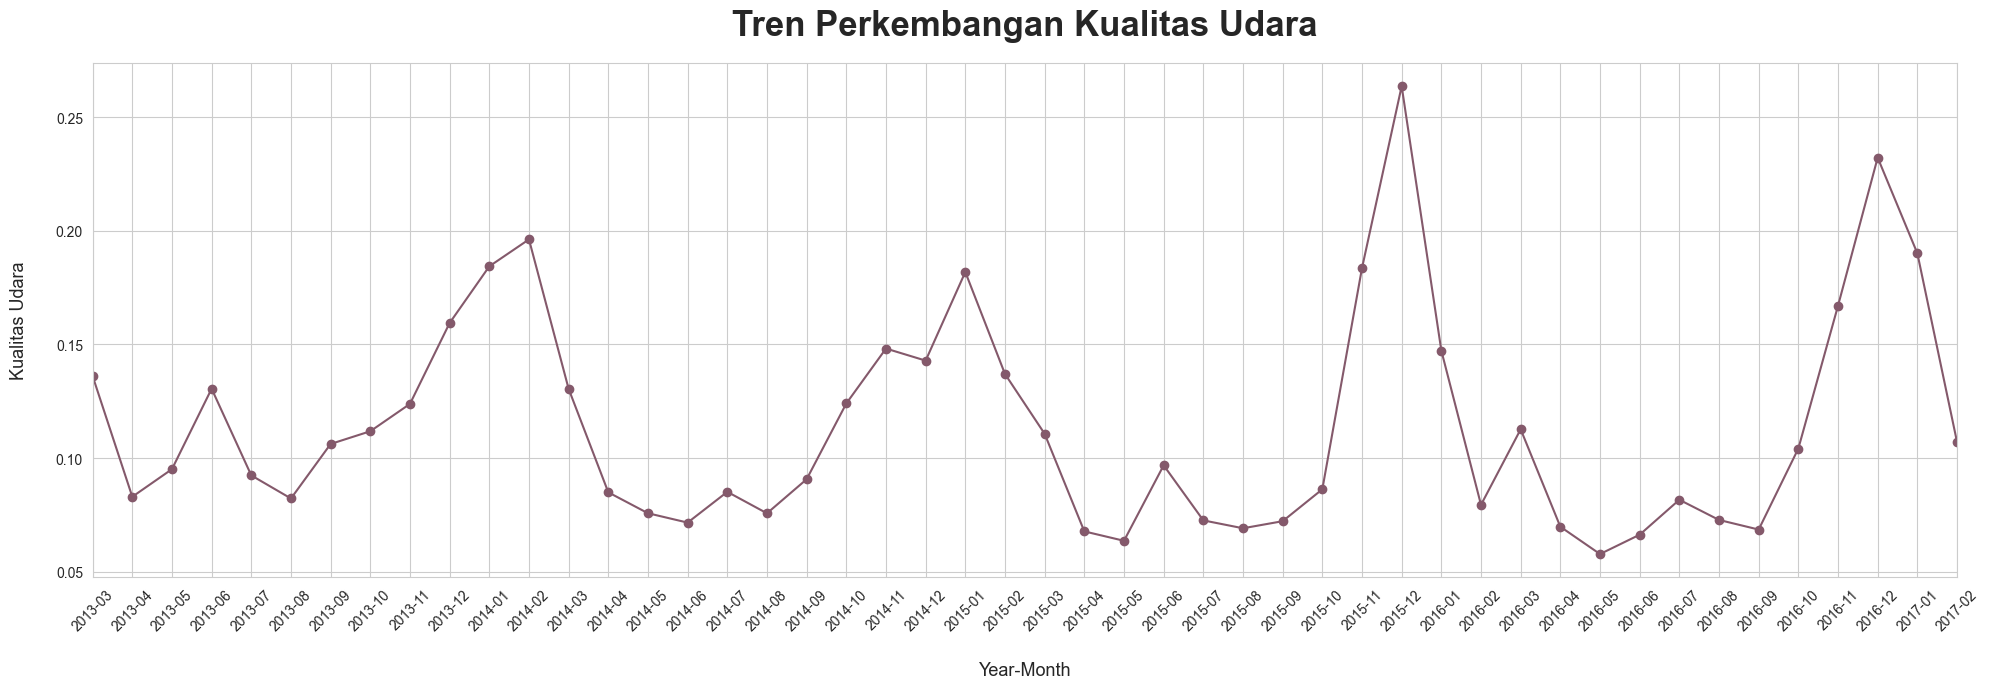

In [43]:
mean_kualitas = all_data.groupby(['year', 'month'])['Kualitas'].mean()
mean_kualitas.index = mean_kualitas.index.map(lambda x: f'{x[0]}-{x[1]:02d}')
plt.figure(figsize=(20, 7))
plt.plot(mean_kualitas.index, mean_kualitas.values, marker='o', linestyle='-', color="#84596B")
plt.xlabel('Year-Month', labelpad=20, fontsize=13)
plt.ylabel('Kualitas Udara', labelpad=20, fontsize=13)
plt.title('Tren Perkembangan Kualitas Udara', fontsize=25, pad=20, fontweight='bold')
plt.xticks(rotation=45)
plt.xlim(mean_kualitas.index[0], mean_kualitas.index[-1])
plt.grid(True)
plt.tight_layout()
plt.show()

**Perkembangan Kualitas Udara: Tren dan Fluktuasi**

Analisis data menunjukkan bahwa kualitas udara mengalami penurunan dari Maret 2013 hingga Februari 2017. Meskipun demikian, terdapat fluktuasi yang signifikan dalam periode tersebut.

Desember 2015 menonjol sebagai bulan dengan kualitas udara terburuk di berbagai wilayah. Hal ini perlu menjadi perhatian serius dan perlu ditelusuri lebih lanjut untuk memahami faktor-faktor yang berkontribusi pada penurunan kualitas udara yang signifikan pada bulan tersebut.

Sebaliknya, Mei 2016 tercatat sebagai bulan dengan kualitas udara terbaik. Hal ini menunjukkan bahwa upaya untuk meningkatkan kualitas udara di dapat menghasilkan hasil yang positif.

Secara keseluruhan, data menunjukkan bahwa masih banyak yang harus dilakukan untuk mencapai tingkat kualitas udara yang optimal Diperlukan upaya berkelanjutan dari berbagai pihak untuk mengatasi berbagai faktor yang berkontribusi pada pencemaran udara.

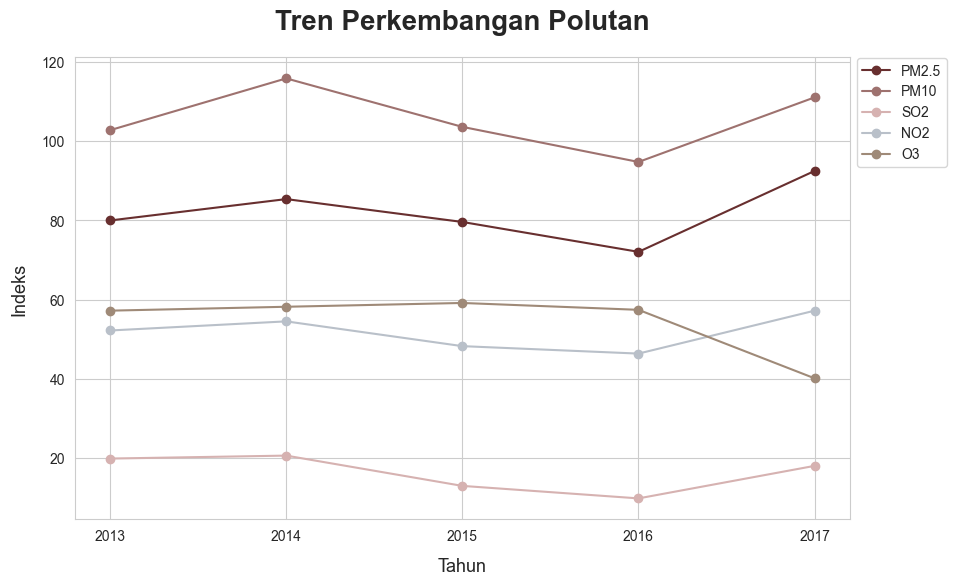

In [44]:
yearly_means = all_data.groupby("year")[["PM2.5", "PM10", "SO2", "NO2", "O3"]].mean()

plt.figure(figsize=(10, 6))
for i,feature in enumerate(yearly_means.columns):
    plt.plot(yearly_means.index, yearly_means[feature], label=feature, marker='o', color=pal[i])

plt.xlabel('Tahun', labelpad=10, fontsize=13)
plt.ylabel('Indeks', labelpad=10, fontsize=13)
plt.title('Tren Perkembangan Polutan', fontsize=20, pad=20, fontweight='bold')
plt.xticks(range(2013,2018))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.88))
plt.grid(True)
plt.show()

**Analisis Tren Polutan Udara (Maret 2013 - Februari 2017)**

Berdasarkan analisis data, rata-rata tingkat polutan menunjukkan pola yang beragam selama periode Maret 2013 hingga Februari 2017.

- PM10 dan PM2.5: Terjadi peningkatan rata-rata tingkat PM10 dan PM2.5, menunjukkan peningkatan risiko kesehatan masyarakat yang terkait dengan paparan partikel halus ini.
- O3: Rata-rata tingkat O3 mengalami penurunan, yang dapat berdampak negatif pada kesehatan manusia dan ekosistem.
- NO2: Terjadi peningkatan rata-rata tingkat NO2, yang merupakan gas beracun dan dapat memperburuk penyakit pernapasan.
- SO2: Rata-rata tingkat SO2 mengalami sedikit penurunan, menunjukkan adanya perbaikan dalam emisi sulfur dioksida.

### 3.2 Apakah kualitas udara semakin baik pada malam hari? Untuk menunjang keaktifan produktivitas

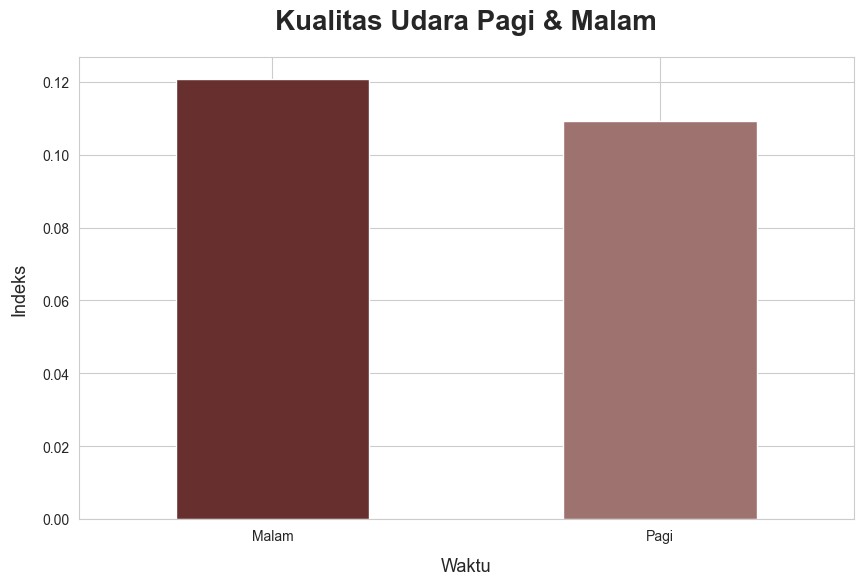

In [45]:
waktu_means = all_data.groupby("Waktu")["Kualitas"].mean()

waktu_means.plot(kind="bar", stacked=False, figsize=(10, 6),color=pal)
plt.xlabel('Waktu', labelpad=10, fontsize=13)
plt.ylabel('Indeks', labelpad=10, fontsize=13)
plt.title('Kualitas Udara Pagi & Malam', fontsize=20, pad=20, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Pada malam hari kualitas udara memburuk, maka disarankan untuk tidak terlalu sering beraktifitas di malam hari.

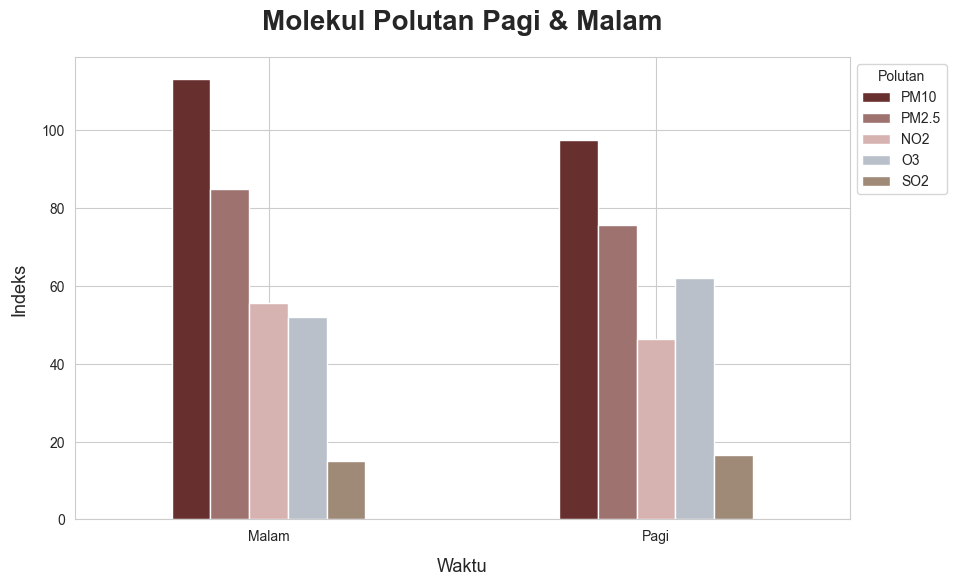

In [46]:
waktu_means = all_data.groupby("Waktu")[["PM10", "PM2.5", "NO2", "O3", "SO2"]].mean()

waktu_means.plot(kind="bar", stacked=False, figsize=(10, 6),color=pal)
plt.xlabel('Waktu', labelpad=10, fontsize=13)
plt.ylabel('Indeks', labelpad=10, fontsize=13)
plt.title('Molekul Polutan Pagi & Malam', fontsize=20, pad=20, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Polutan", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

**Kualitas Udara Malam Hari dan Saran Aktivitas**

Analisis data menunjukkan bahwa kualitas udara di malam hari umumnya lebih buruk dibandingkan dengan siang hari. Hal ini disebabkan oleh beberapa faktor, seperti:

- Inversi suhu: Pada malam hari, suhu udara di permukaan bumi lebih dingin daripada di lapisan atas. Hal ini menyebabkan udara terperangkap di dekat permukaan bumi, sehingga polutan tidak dapat terdispersi dengan baik.
- Aktivitas kendaraan: Aktivitas kendaraan yang berkurang di malam hari dapat menyebabkan emisi tertahan di dekat permukaan bumi.
- Emisi industri: Beberapa industri beroperasi di malam hari, dan emisi dari industri ini dapat berkontribusi pada penurunan kualitas udara.

### 3.3 Bagaimana kualitas udara pada beberapa Station. Apakah terdapat variasi bedasarkan local geografis?

In [47]:
data_3 = all_data.groupby(["year", "station"])[["PM10", "PM2.5", "NO2", "O3", "SO2"]].mean().reset_index()
data_2013 = data_3[data_3['year'] == 2013]
data_2014 = data_3[data_3['year'] == 2014]
data_2015 = data_3[data_3['year'] == 2015]
data_2016 = data_3[data_3['year'] == 2016]
data_2017 = data_3[data_3['year'] == 2017]

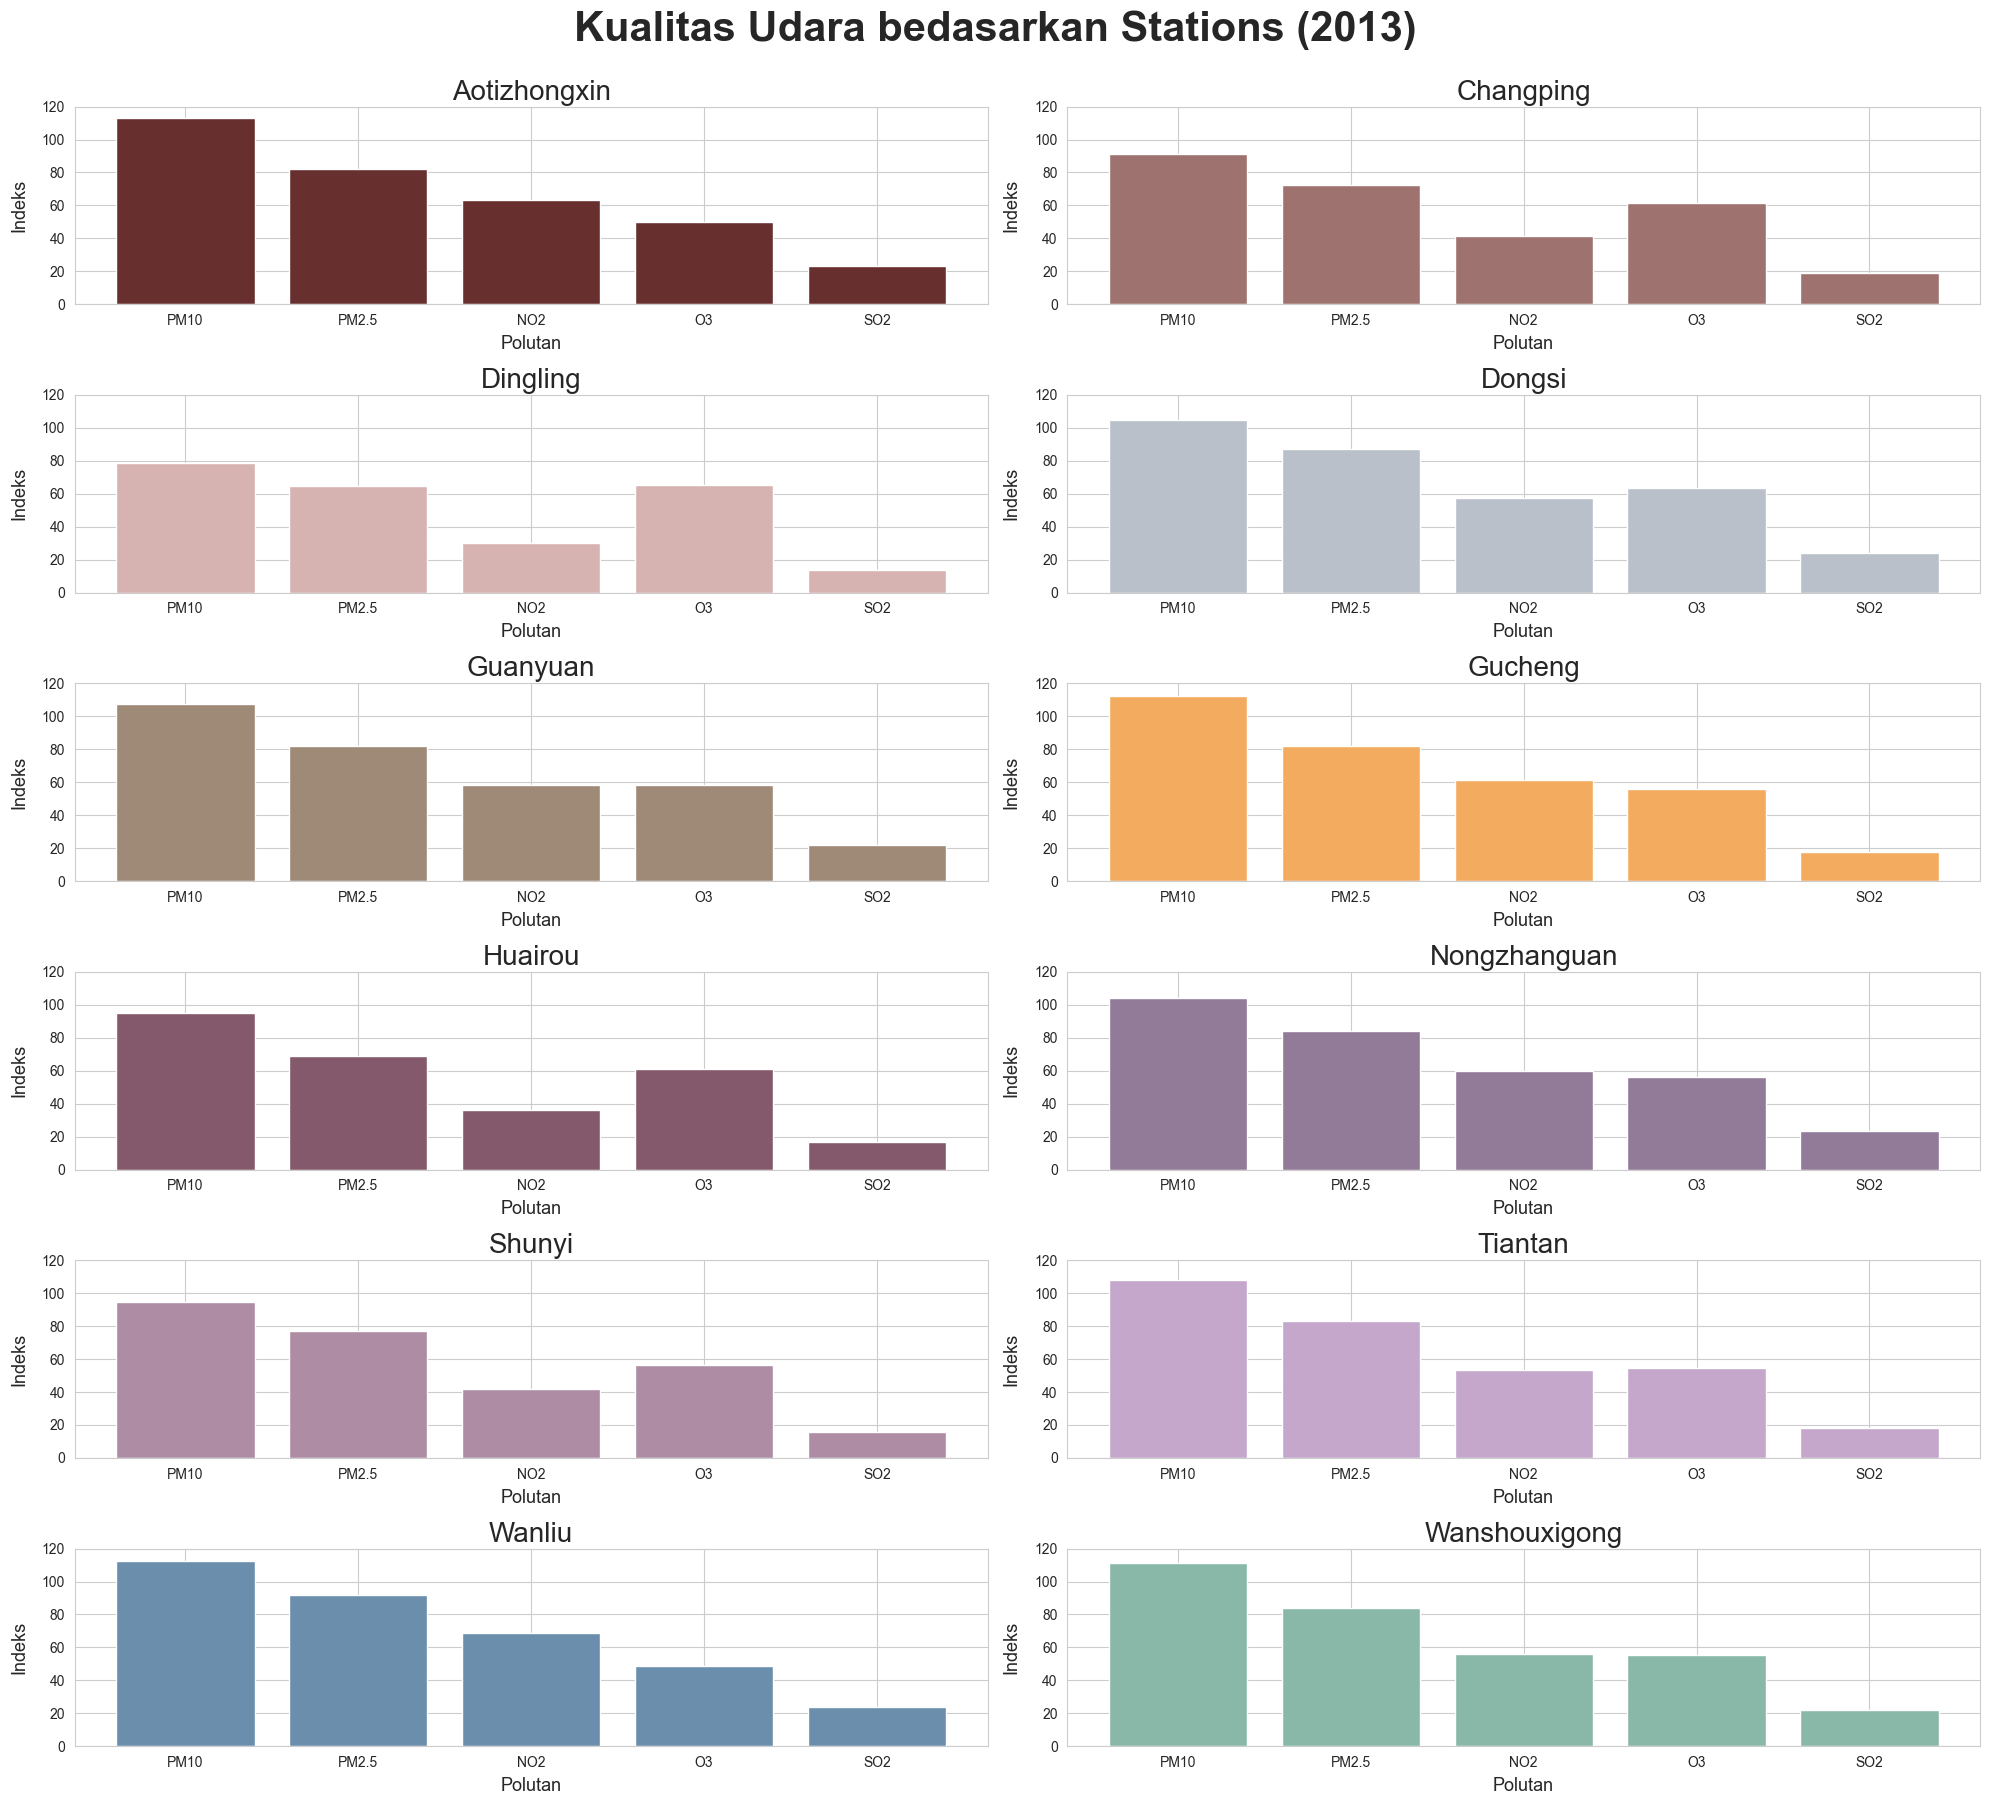

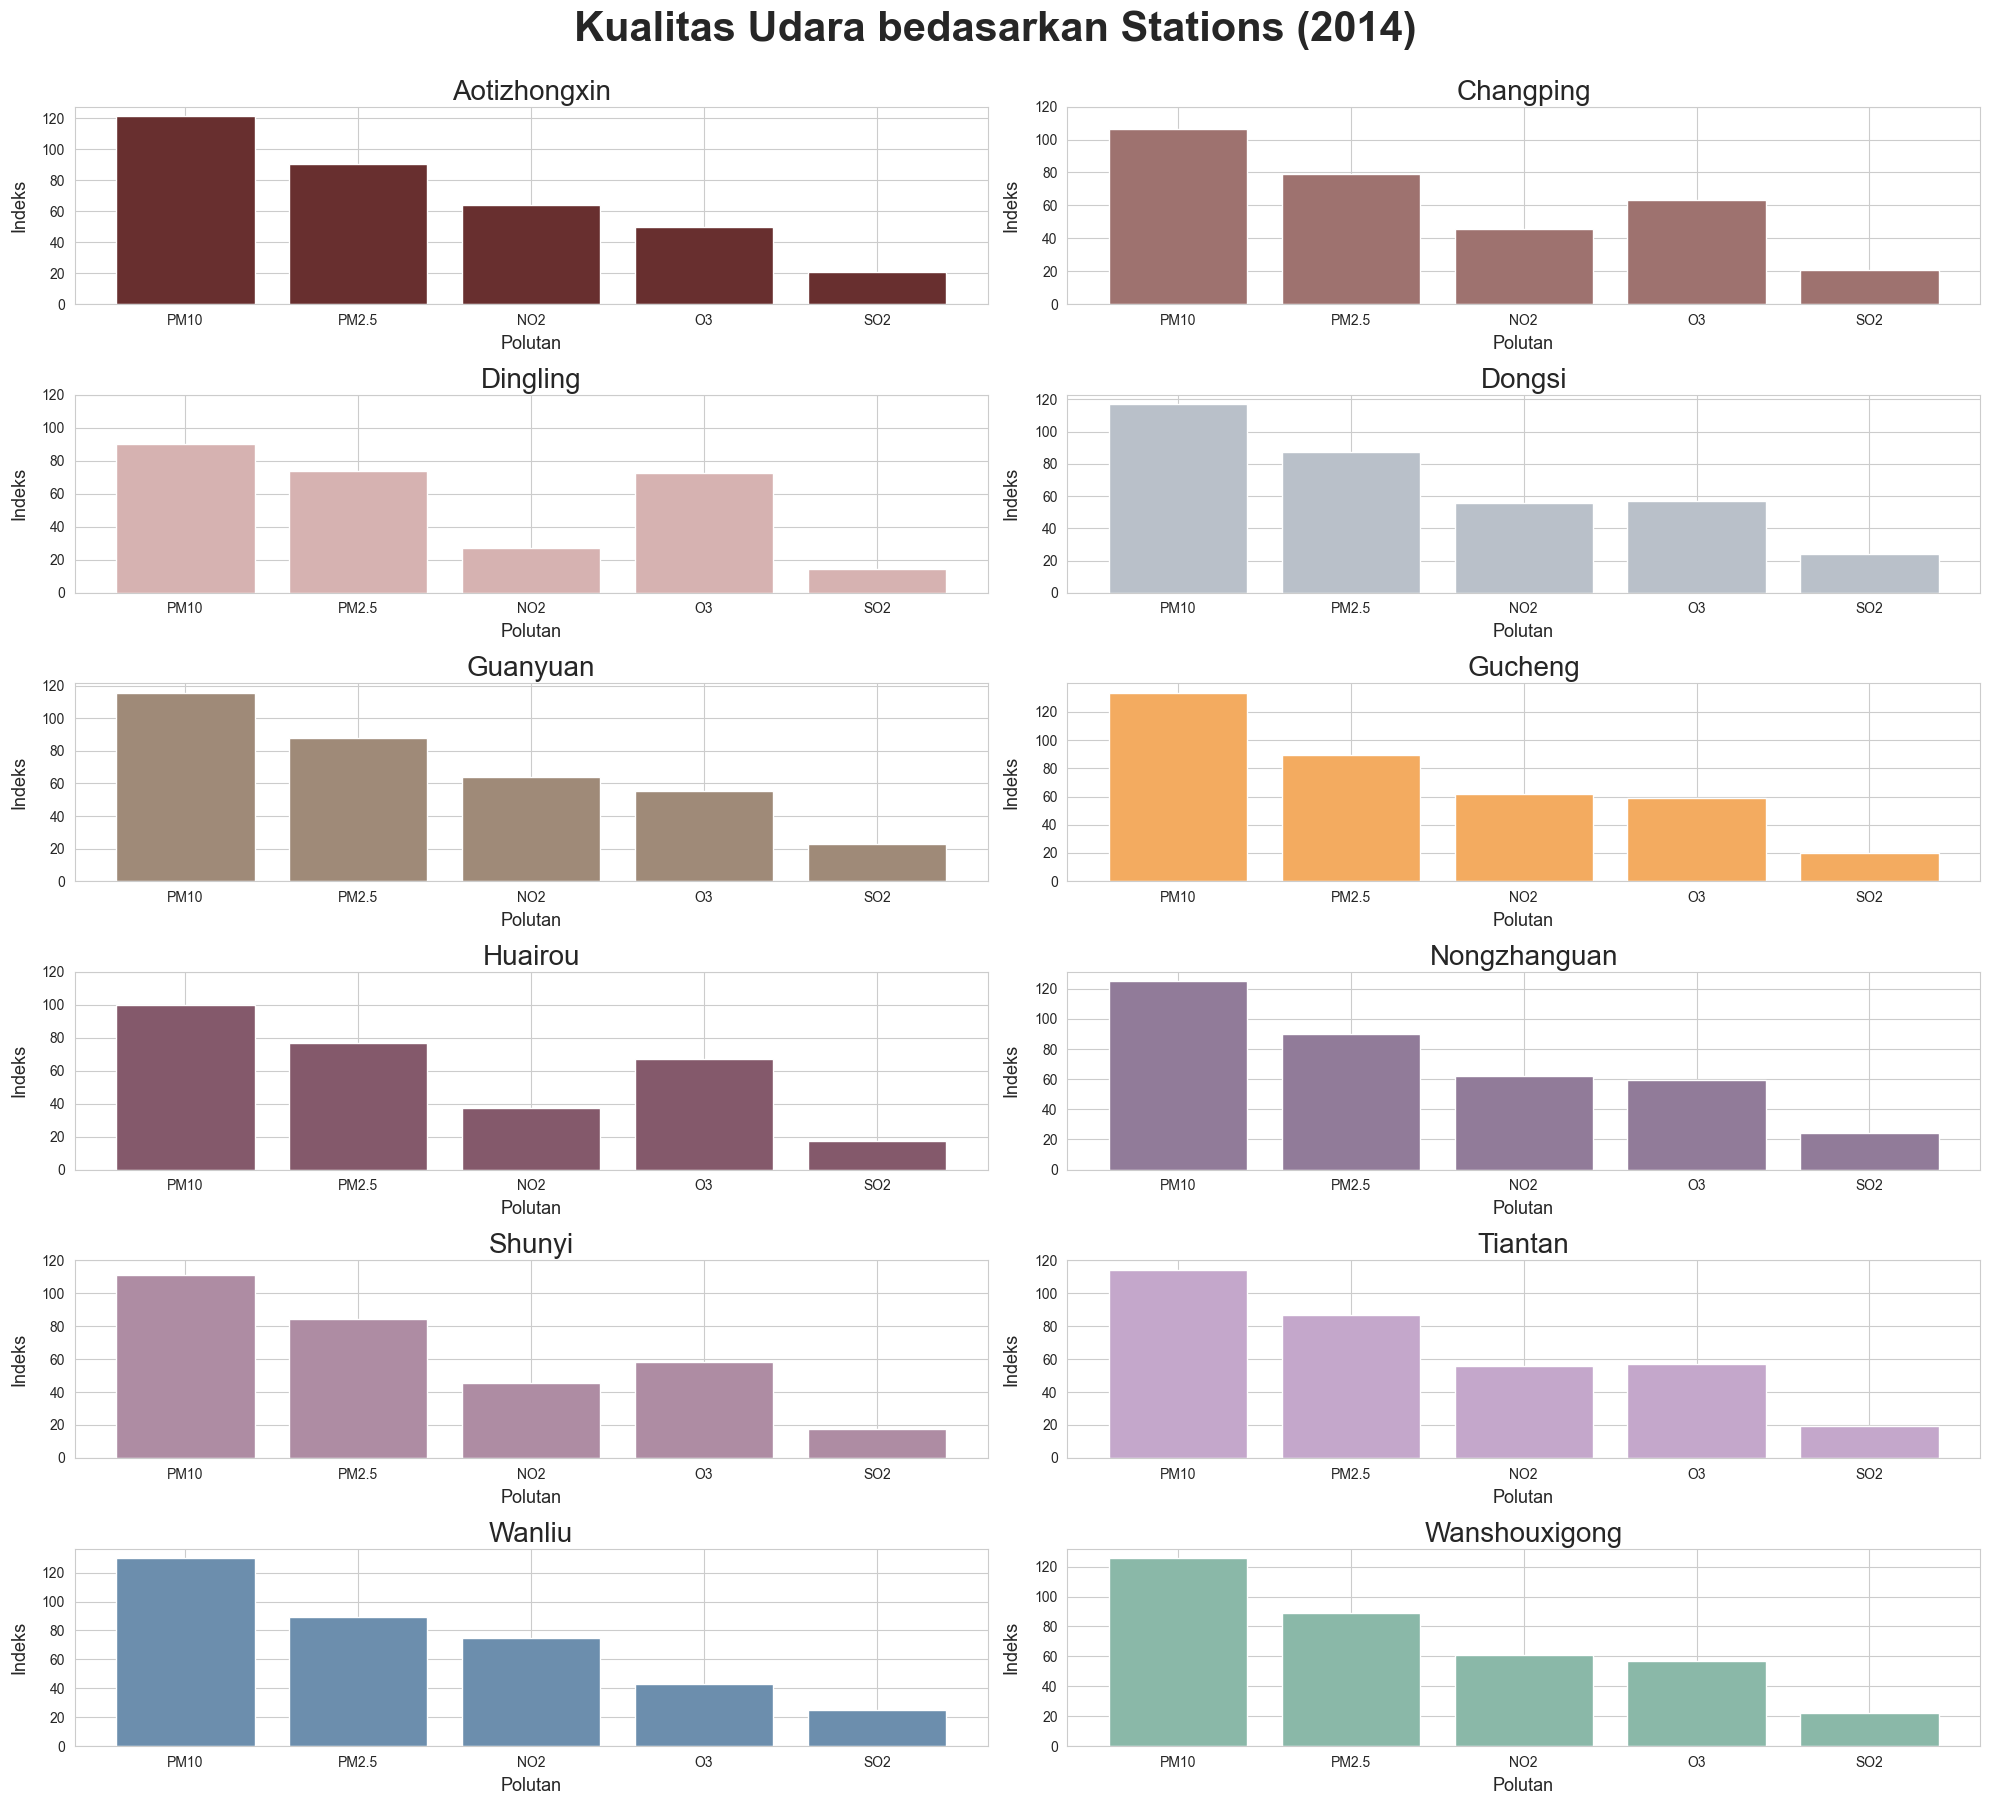

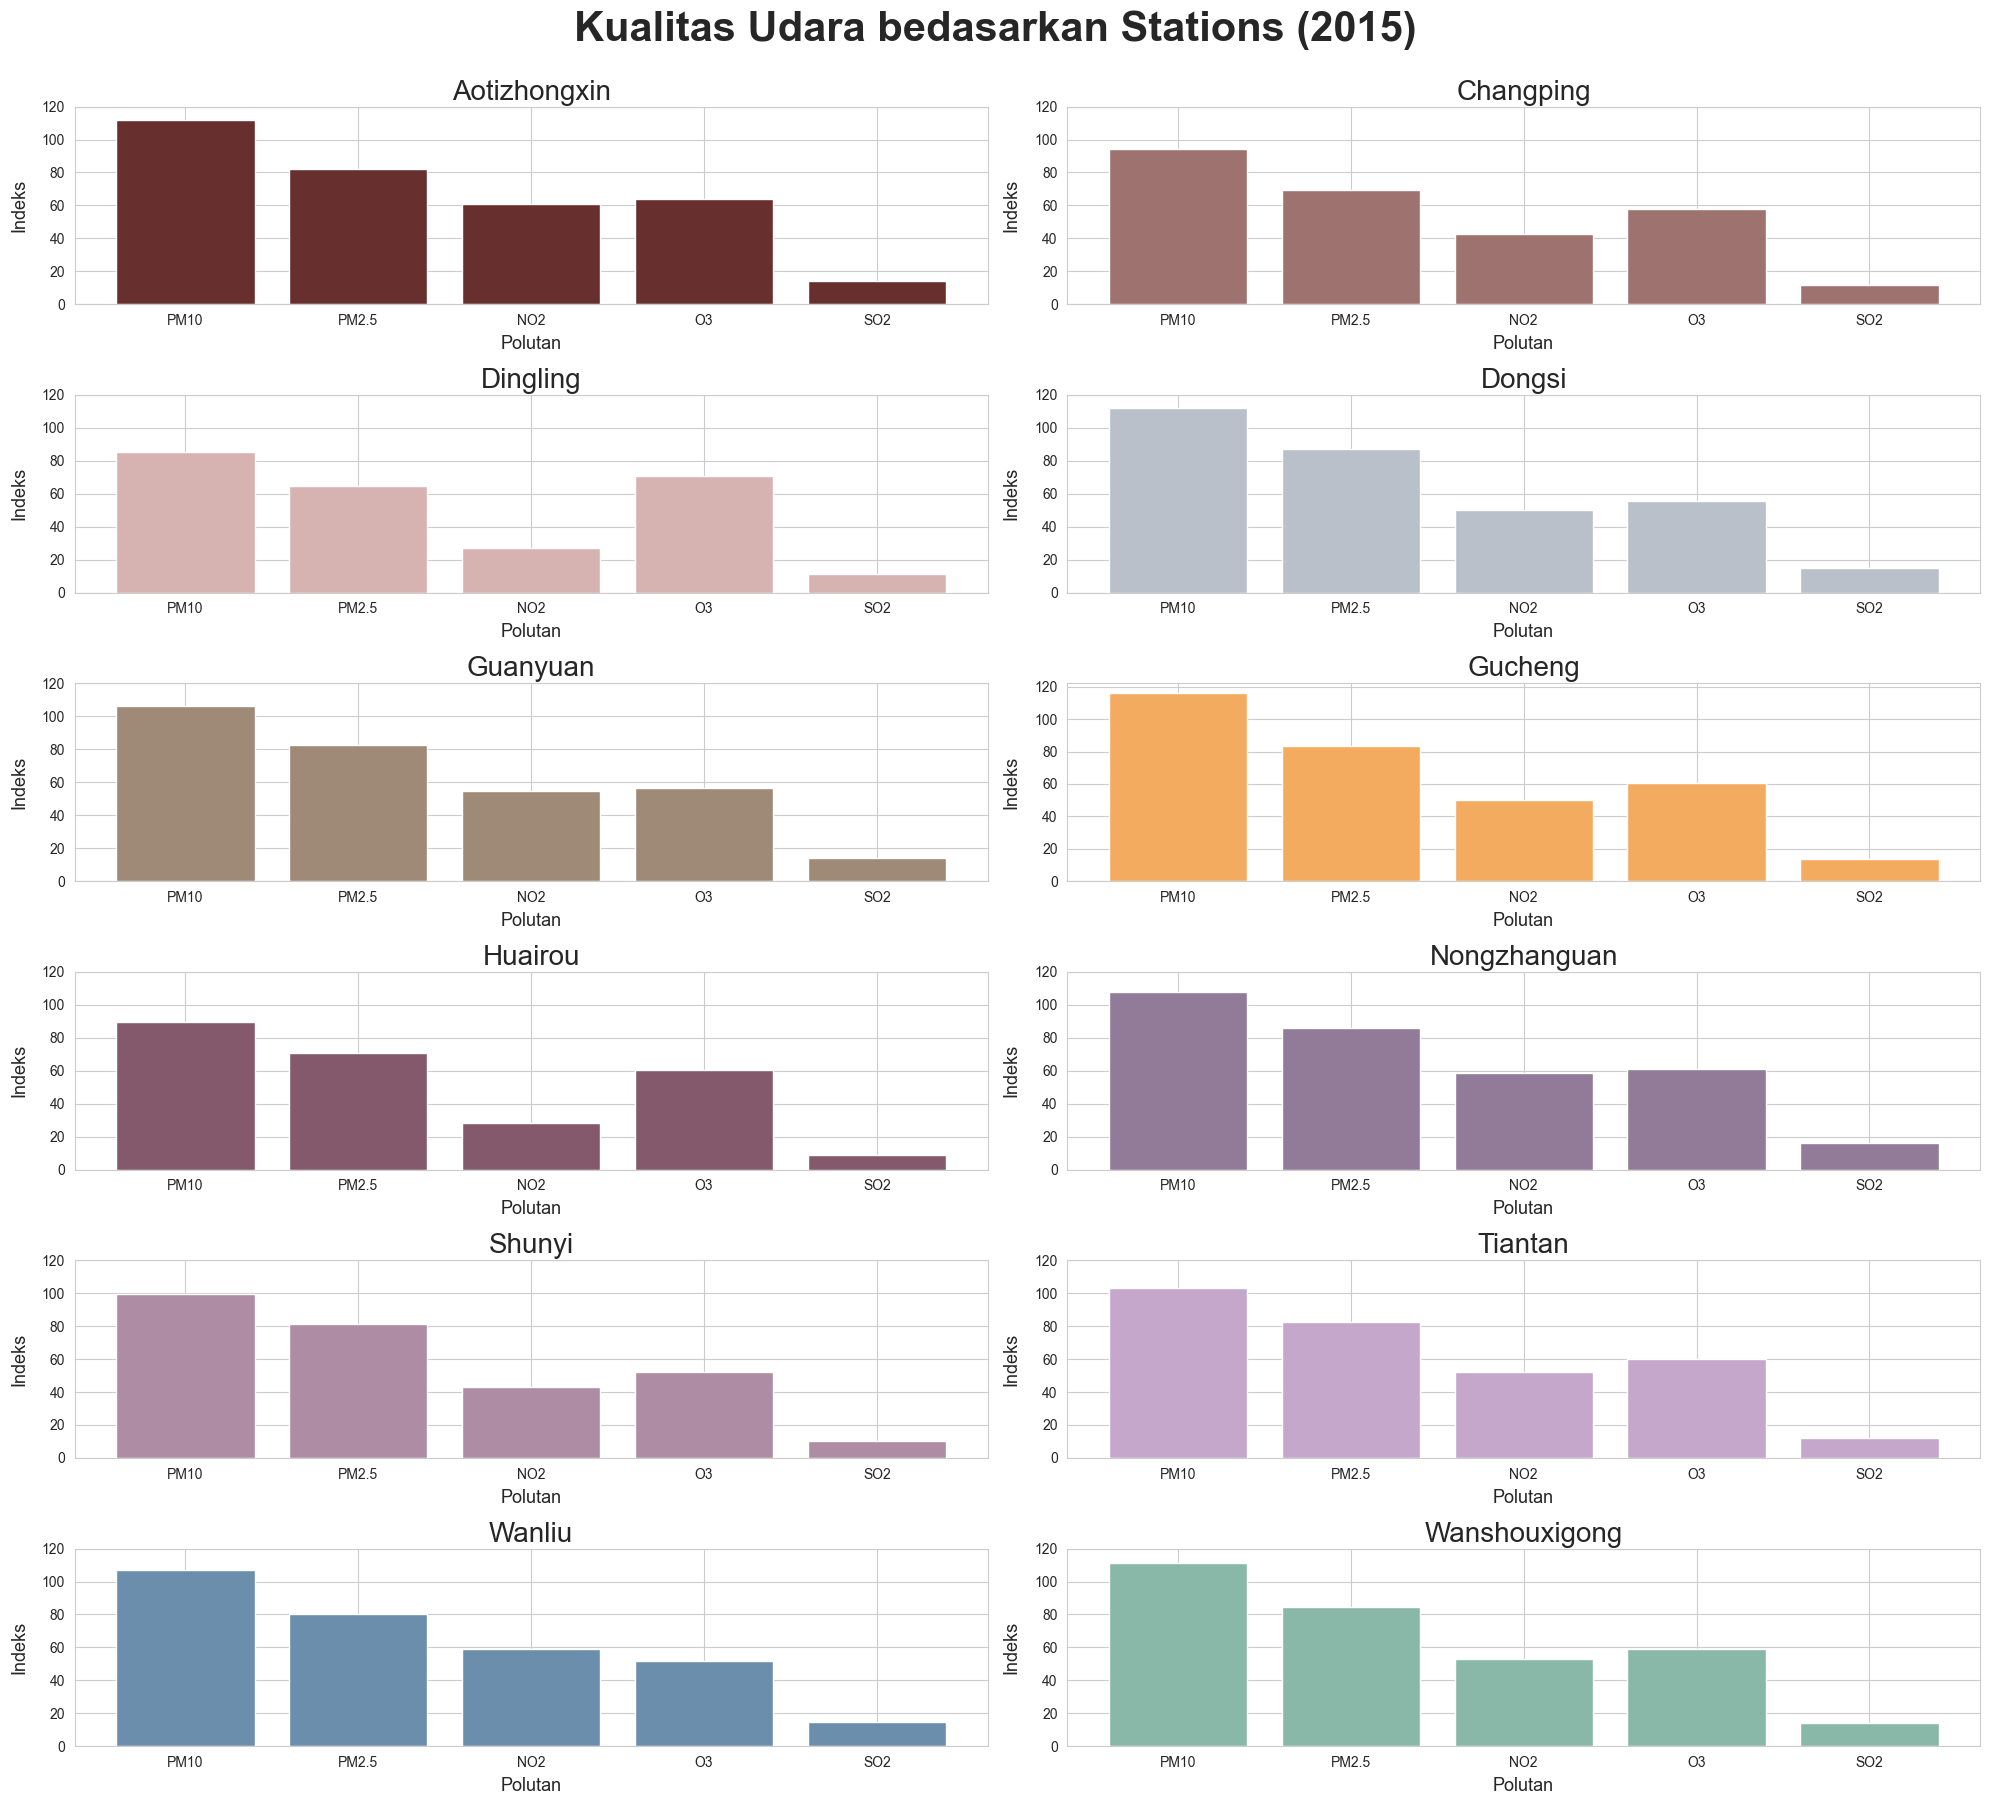

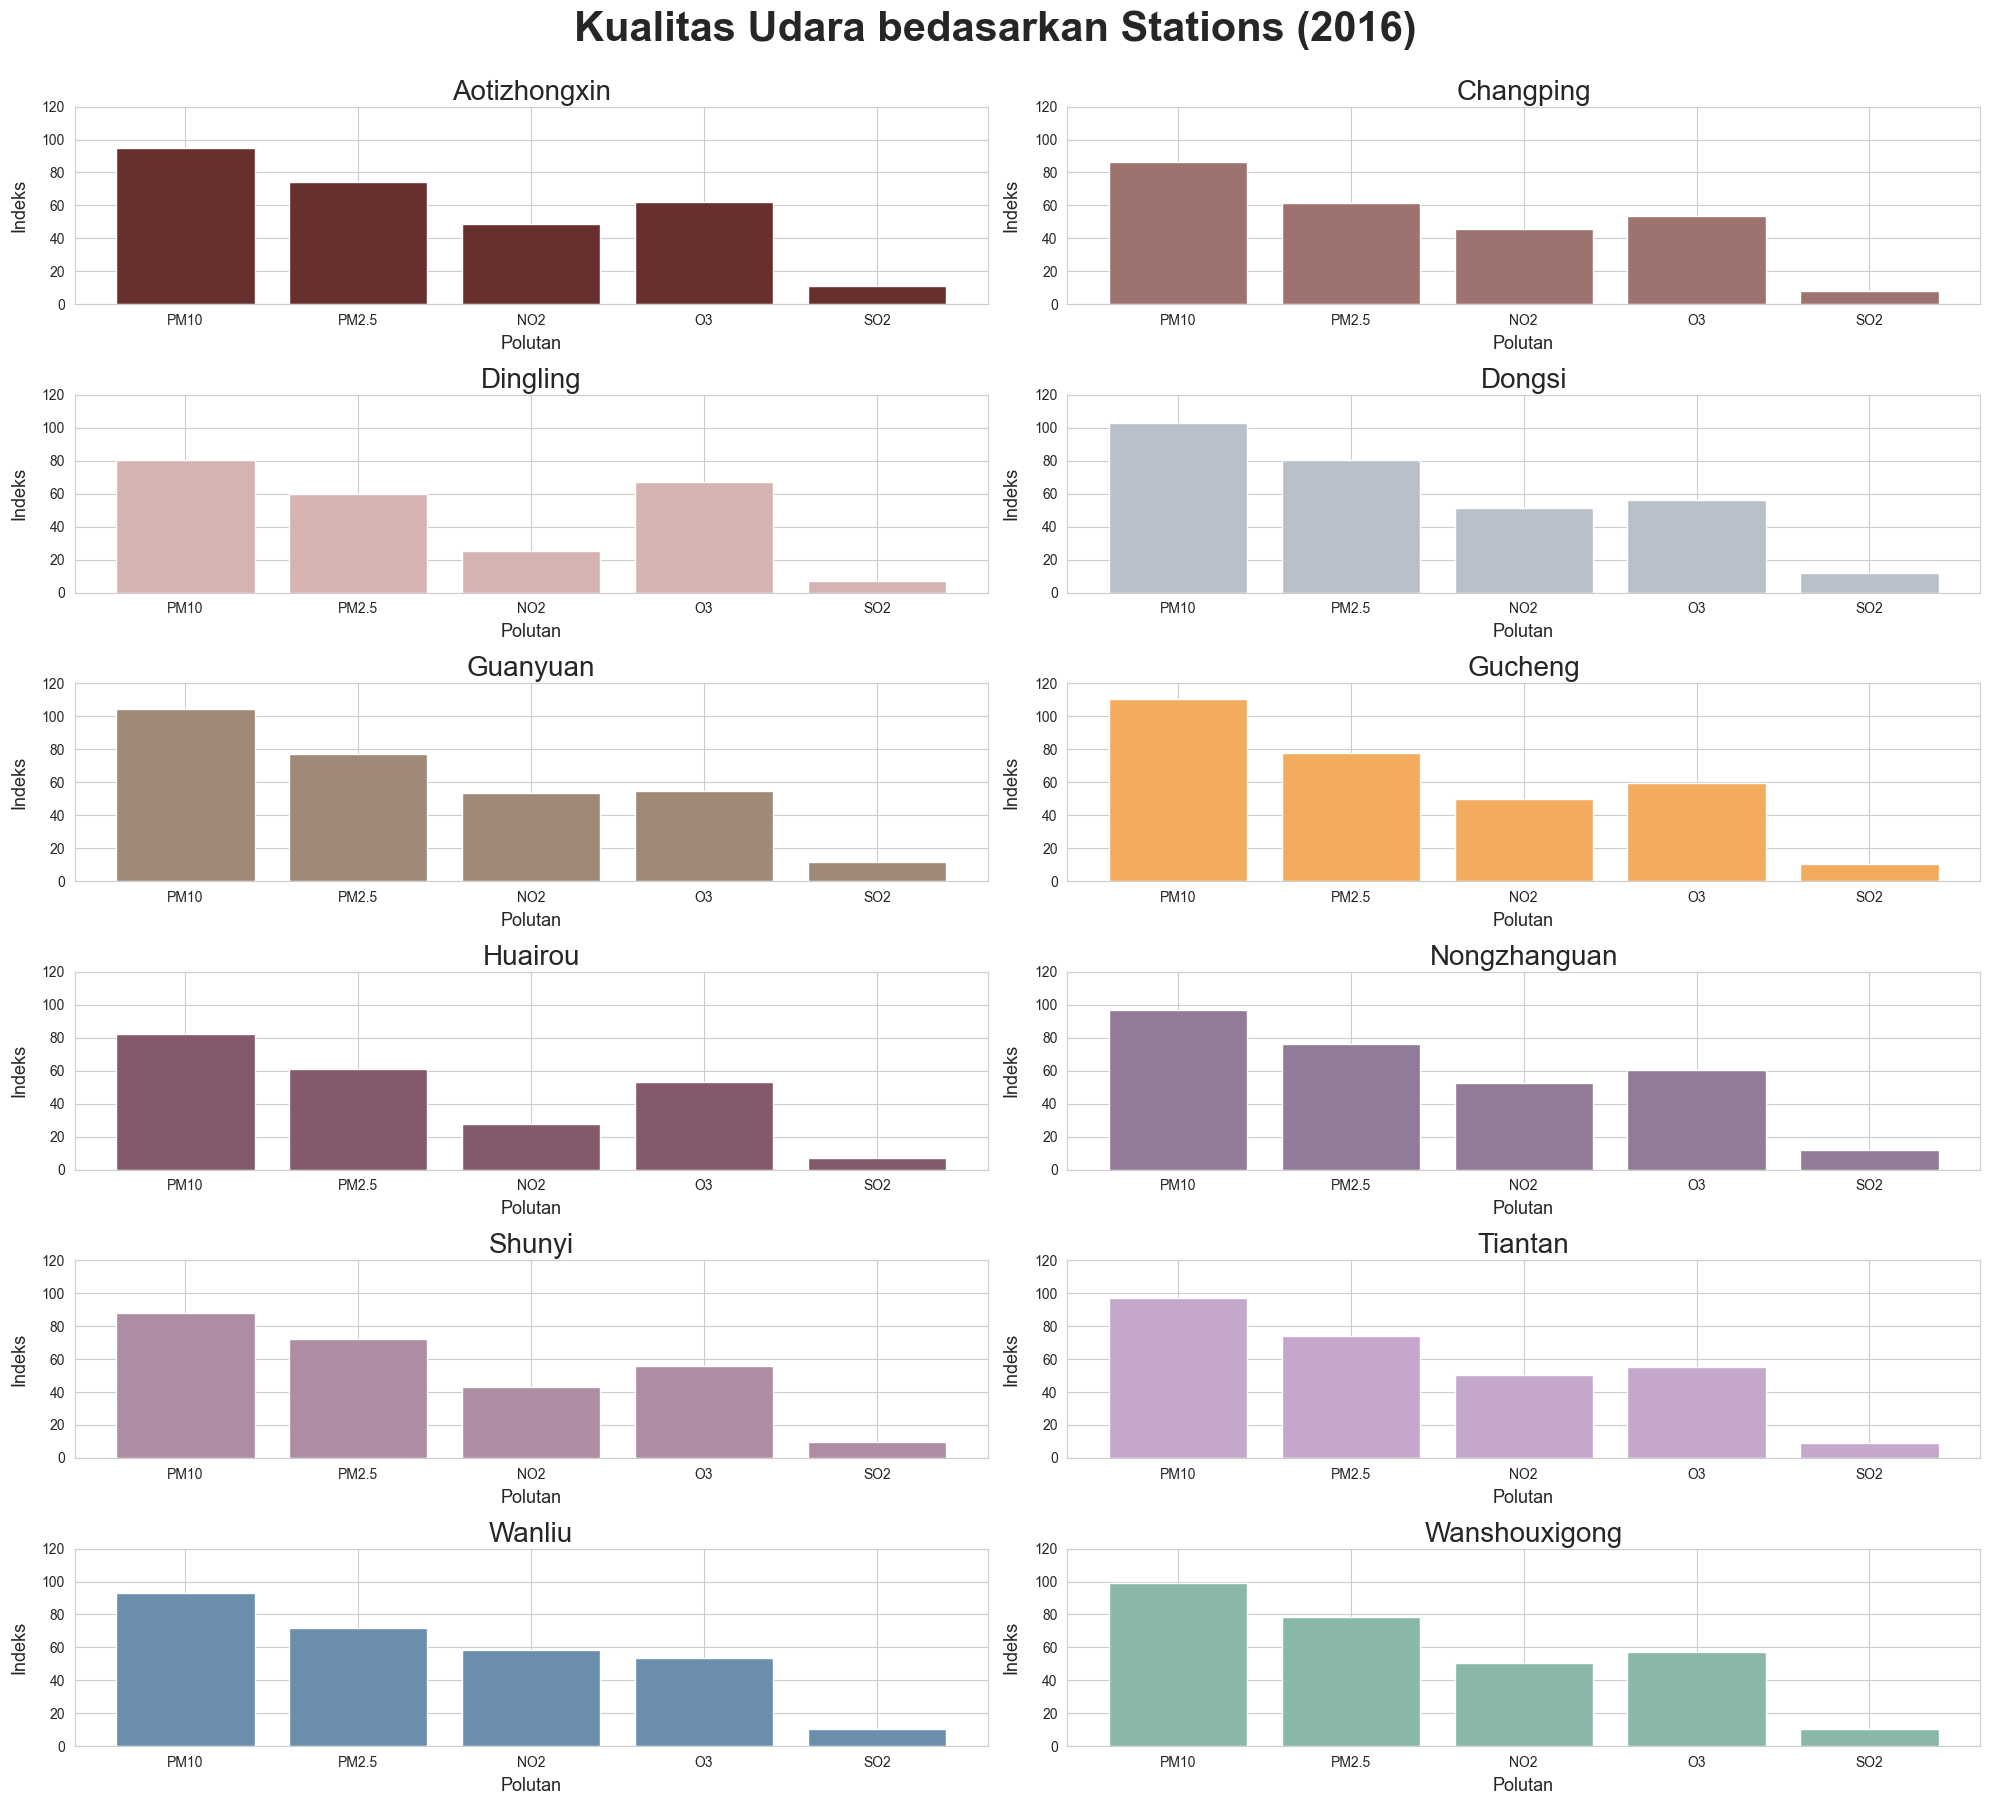

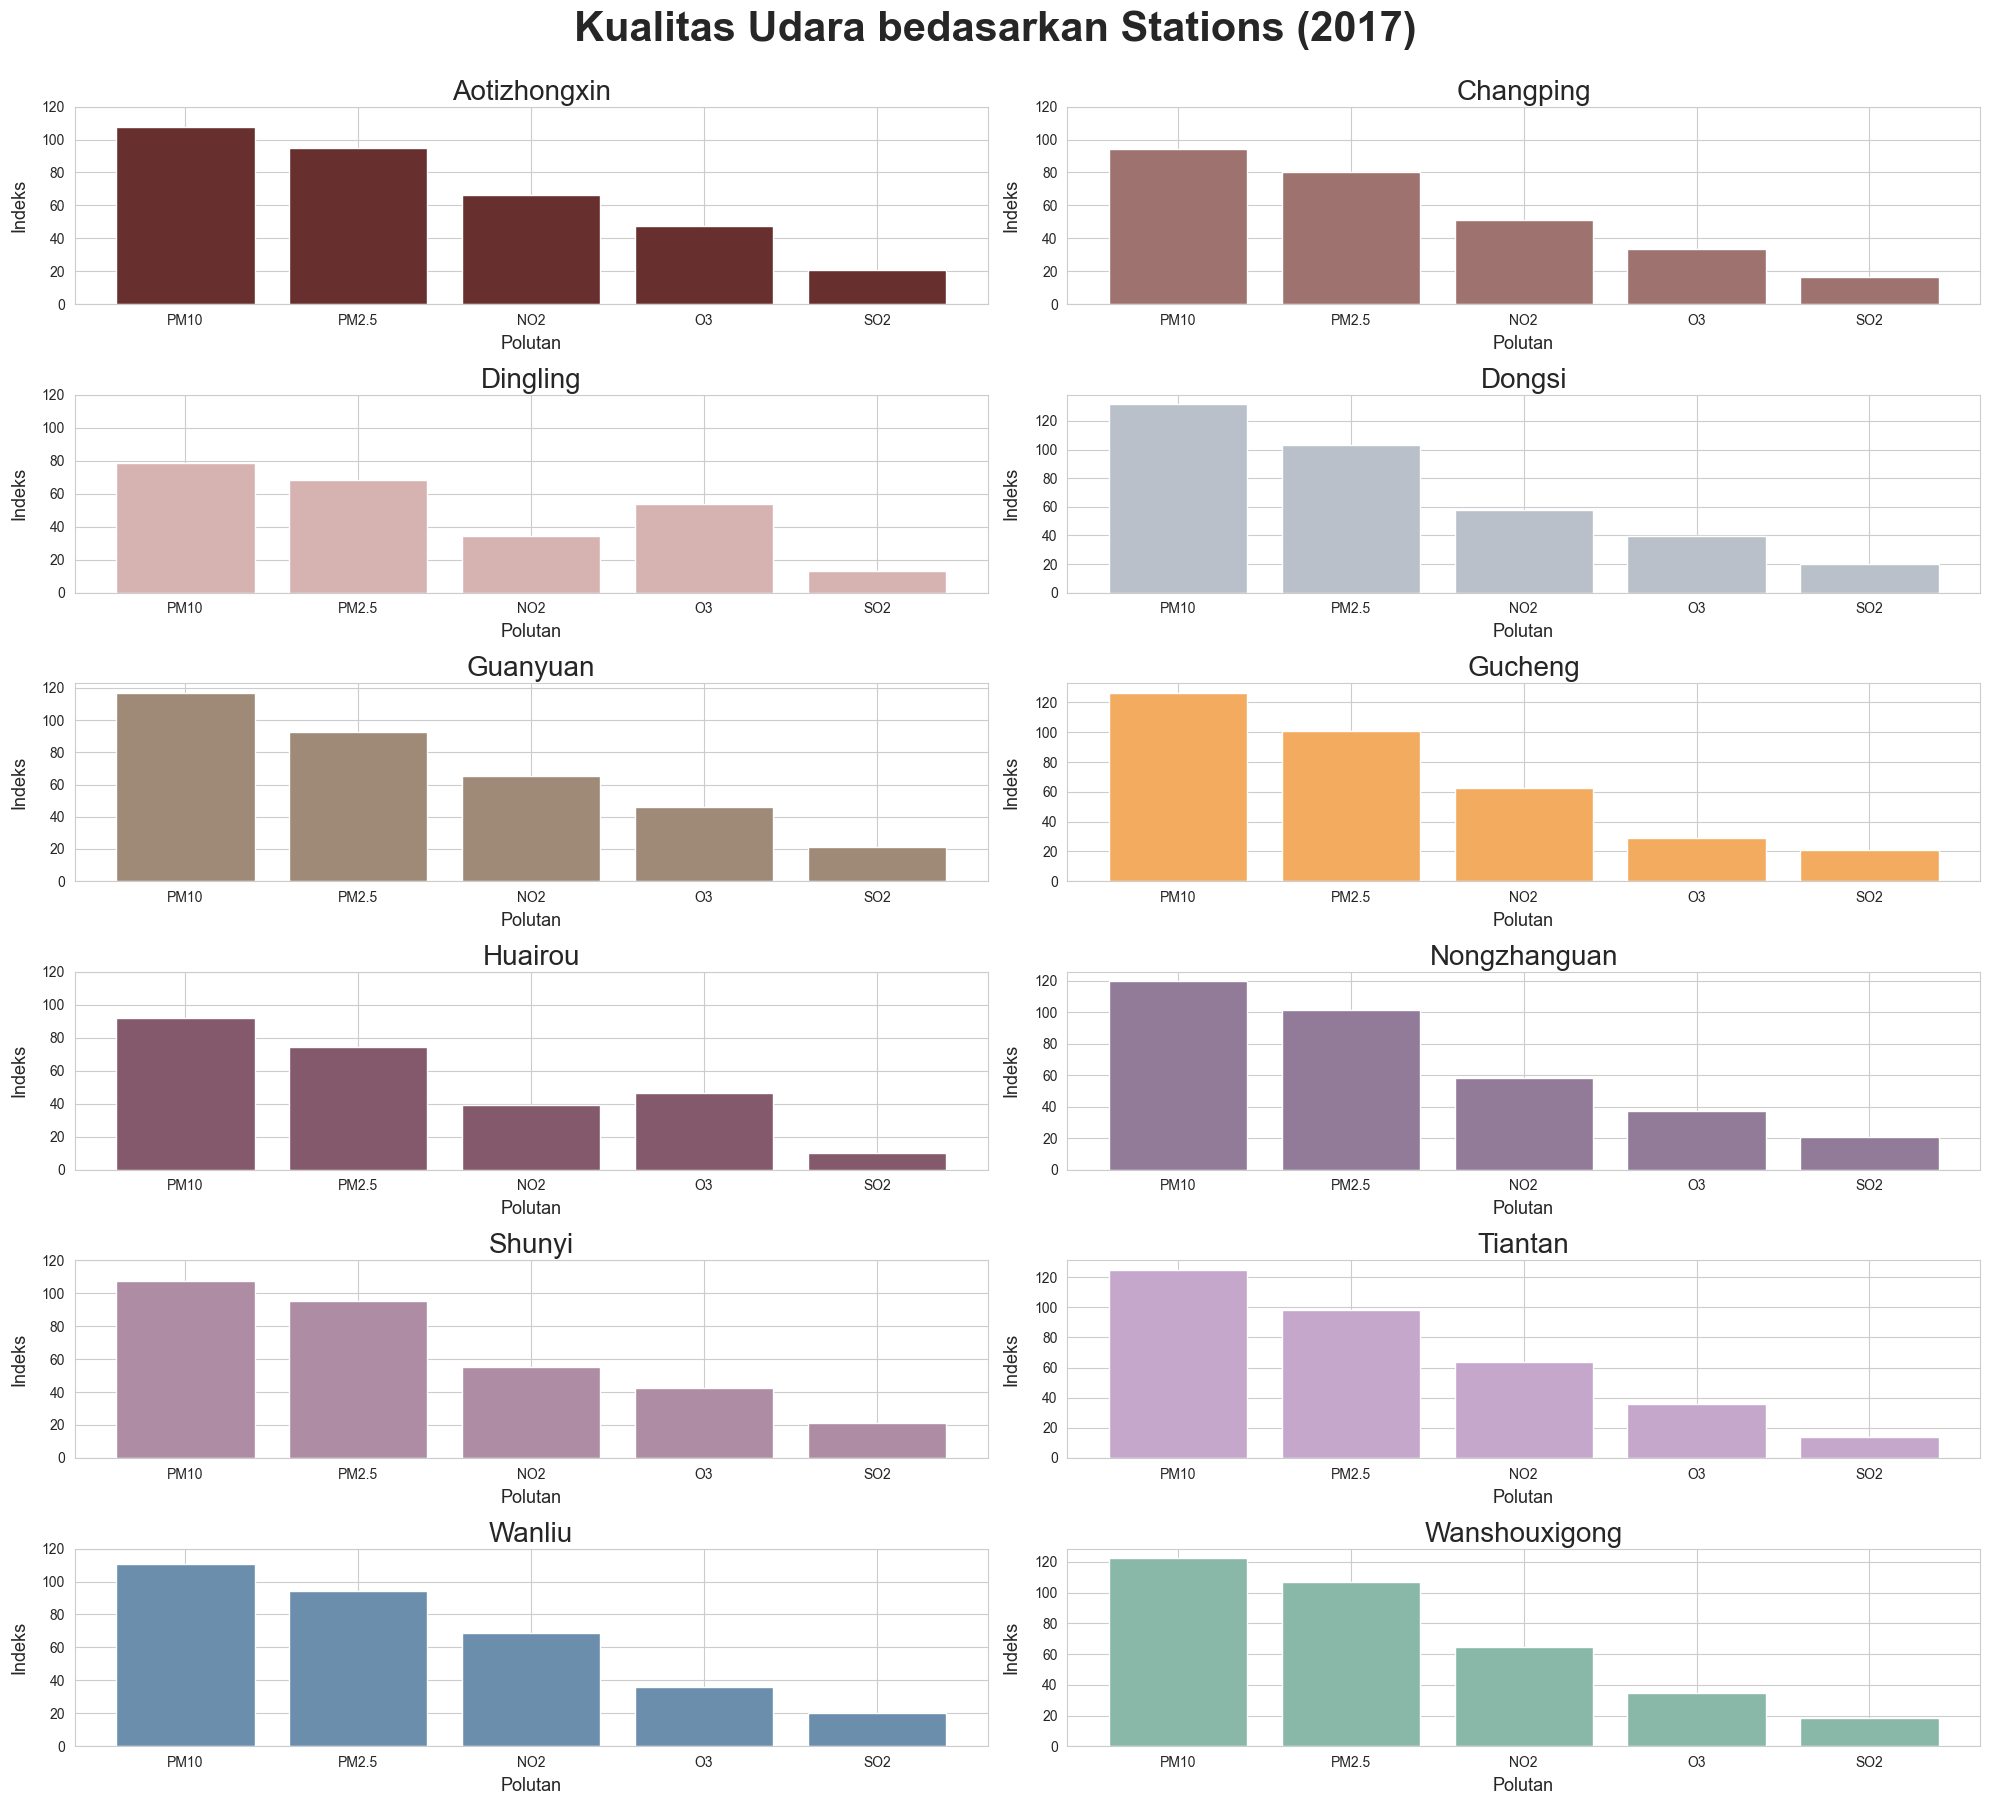

In [48]:
def plot_yearly_data(data, year):
    fig, axes = plt.subplots(6, 2, figsize=(20, 18))
    fig.suptitle(f'Kualitas Udara bedasarkan Stations ({year})', fontsize=30, fontweight='bold', y=1)    
    for i, (ax, (_, row)) in enumerate(zip(axes.flat, data.iterrows())):
        station = row['station']
        ax.bar(data.columns[2:], row[2:], color=pal[i])
        ax.set_title(station, fontsize=20, pad=5)
        ax.set_xlabel('Polutan', labelpad=5, fontsize=13)
        ax.set_ylabel('Indeks', labelpad=10, fontsize=13)
        ax.set_yticks(range(0,121,20))
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_yearly_data(data_2013, 2013)
plot_yearly_data(data_2014, 2014)
plot_yearly_data(data_2015, 2015)
plot_yearly_data(data_2016, 2016)
plot_yearly_data(data_2017, 2017)

**Analisis Kualitas Udara di Berbagai Stasiun (2013-2017)**

Analisis data menunjukkan variasi kualitas udara di beberapa stasiun di periode 2013-2017:

1. Stasiun dengan Kualitas Udara Baik (2016-2017):
Stasiun Aotizhongxin, Changping, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, dan Wanshouxigong di 2016 memiliki PM10 dan PM2.5 rendah mengartikan bahwa kualitas udara pada waktu itu baik, namun ketika 2017 mengalami peningkatan PM10 dan PM2.5 yang signifikan yang berarti kualitas udara memburuk.

2. Station **Dingling** mengalami signifikan kualitas udara yang sangat stabil di 2013 - 2017

3. Penurunan Kualitas Udara (2017):
Pada tahun 2017, terjadi peningkatan signifikan pada tingkat PM10 dan PM2.5 di semua stasiun, menandakan penurunan kualitas udara sehat secara keseluruhan.

4. Fluktuasi Kualitas Udara:
Stasiun Dingling mengalami fluktuasi kualitas udara yang signifikan selama periode 2013-2017.
Stasiun Gucheng dan Wanliu menunjukkan fluktuasi polusi PM10 dan PM2.5 tertinggi dalam data pada tahun 2014, dengan sedikit penurunan di tahun-tahun berikutnya.

## Conclusion

Berdasarkan analisis data kualitas udara dari tahun 2013 hingga 2017, dapat ditarik kesimpulan sebagai berikut:

**Pertanyaan 1: Tren Kualitas Udara**

1. Secara umum, kualitas udara mengalami peningkatan buruk dari tahun 2013 hingga 2017.

2. Terdapat fluktuasi kualitas udara yang signifikan dalam periode tersebut, dengan bulan Desember 2015 sebagai bulan dengan kualitas udara terburuk dan Mei 2016 sebagai bulan terbaik.

**Pertanyaan 2: Kualitas Udara Malam Hari**

1. Pada malam hari, kualitas udara umumnya lebih buruk dibandingkan dengan siang hari.

2. Hal ini disebabkan oleh beberapa faktor, seperti inversi suhu, berkurangnya aktivitas kendaraan, dan emisi industri.
Oleh karena itu, disarankan untuk tidak terlalu sering beraktivitas di luar ruangan pada malam hari, terutama bagi orang-orang yang memiliki masalah kesehatan pernapasan.

**Pertanyaan 3: Kualitas Udara di Berbagai Stasiun**

1. Terdapat variasi kualitas udara di beberapa stasiun.

2. Stasiun Aotizhongxin, Changping, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, dan Wanshouxigong menunjukkan kualitas udara yang baik pada tahun 2016, namun mengalami penurunan pada tahun 2017.

3. Stasiun Dingling mengalami fluktuasi kualitas udara yang signifikan stabil selama periode 2013-2017.

4. Stasiun Gucheng dan Wanliu menunjukkan fluktuasi polusi PM10 dan PM2.5 tertinggi dalam data pada tahun 2014, dengan sedikit penurunan di tahun-tahun berikutnya.

Kesimpulan:

Kualitas udara di berbagai wilayah perlu mendapat perhatian serius dan upaya berkelanjutan dari berbagai pihak untuk meningkatkannya. Upaya ini dapat dilakukan dengan berbagai cara, seperti:
- Mengurangi emisi gas buang kendaraan dengan menerapkan standar emisi yang lebih ketat dan mendorong penggunaan kendaraan ramah lingkungan.
- Mengurangi emisi industri dengan menerapkan teknologi yang lebih bersih dan efisien.
- Meningkatkan kesadaran masyarakat tentang pentingnya menjaga kualitas udara dan mendorong mereka untuk berperilaku ramah lingkungan.
- Masyarakat perlu diimbau untuk mengurangi aktivitas di luar ruangan pada malam hari dan saat kualitas udara sedang buruk. Hal ini untuk menghindari paparan terhadap polutan udara yang dapat membahayakan kesehatan.

Upaya bersama dari berbagai pihak sangatlah penting untuk menciptakan lingkungan yang bersih dan sehat bagi semua orang.